In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import scipy as sp
import skimage
import os

from skimage.color import rgb2gray
from scipy.signal import convolve2d
from scipy.ndimage import rank_filter
from scipy.stats import norm
from PIL import Image
from utils import dist2, gen_dgauss, find_sift, harris

In [ ]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

In [7]:
print(os.getcwd()+'/uttower_left.jpeg')

/home/xiaobao/Python_Venvs/cv_venv/EME_174/Image_Stitching/uttower_left.jpeg


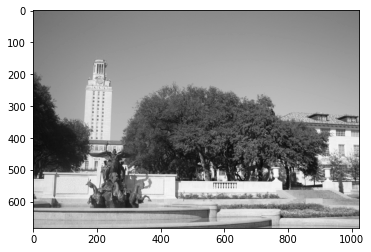

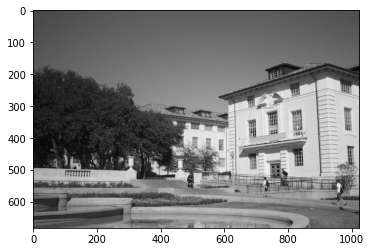

In [23]:
towerLeft = cv.imread(os.getcwd()+'/uttower_left.jpeg', 0)
towerRight = cv.imread(os.getcwd()+'/uttower_right.jpeg', 0)
towerLeft = cv.normalize(towerLeft.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
towerRight = cv.normalize(towerRight.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)

plt.figure()
plt.imshow(towerLeft, cmap=plt.get_cmap('gray'))
plt.figure()
plt.imshow(towerRight, cmap=plt.get_cmap('gray'))

### Detect Feature Points via Harris Detector

<class 'numpy.ndarray'>


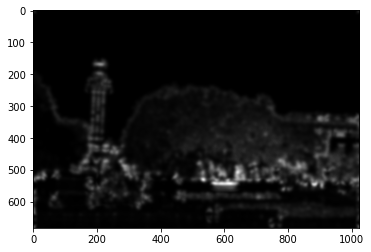

In [28]:
tower_harris_L = harris(towerLeft, 5.0, 16.0)
print(type(tower_harris_L))

plt.imshow(tower_harris_L, cmap=plt.get_cmap('gray'))

<class 'numpy.ndarray'>


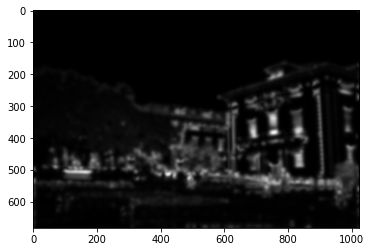

In [29]:
tower_harris_R = harris(towerRight, 5.0, 16.0)
print(type(tower_harris_R))

plt.imshow(tower_harris_R, cmap=plt.get_cmap('gray'))